In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data from the stores.csv file into a DataFrame
stores_df = pd.read_csv('stores.csv')

# Display the first few rows to confirm it loaded correctly
display(stores_df.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
stores_df.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [7]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
# Load the data from the features.csv file into a DataFrame
features_df = pd.read_csv('features.csv')

# Display the first few rows to confirm it loaded correctly
display(features_df.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
features_df.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
# Load the data from the train.csv file into a DataFrame
train_df = pd.read_csv('train.csv')

# Display the first few rows to confirm it loaded correctly
display(train_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [16]:
train_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [18]:
# merging 3 different sets
df = train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [20]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [21]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [22]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [23]:
df.shape

(421570, 16)

In [24]:
df['Store'].nunique() # number of different values

45

In [25]:
df['Dept'].nunique() # number of different values

81

In [26]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

/tmp/ipython-input-2014498793.py:1: FutureWarning: The provided callable <function mean at 0x7ca01ab22700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [27]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


In [28]:
df = df.loc[df['Weekly_Sales'] > 0]

In [29]:
df.shape # new data shape

(420212, 16)

In [30]:
# to see first and last 5 rows using pd.concat
display(pd.concat([df['Date'].head(5), df['Date'].tail(5)]))

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
421565,2012-09-28
421566,2012-10-05
421567,2012-10-12
421568,2012-10-19
421569,2012-10-26


/tmp/ipython-input-1725052073.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Non-Holiday', 'Holiday'])


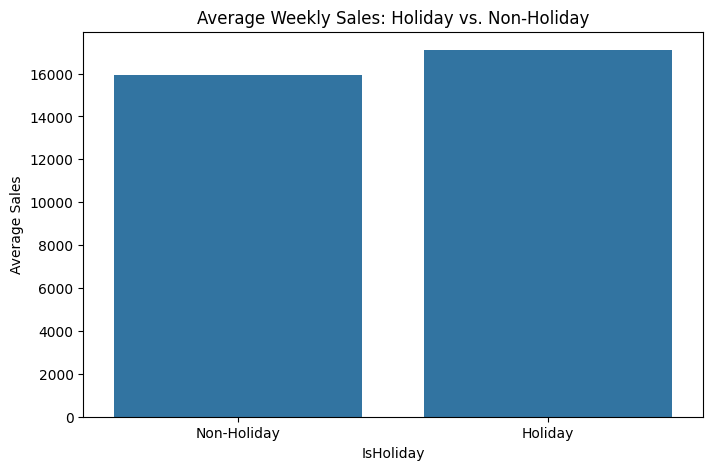

In [31]:
# Plot 1: Bar Chart for Average Weekly Sales
# Group by IsHoliday and calculate the mean of Weekly_Sales
holiday_avg_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5)) # Initialize figure and axes

sns.barplot(x=holiday_avg_sales.index, y=holiday_avg_sales.values, ax=ax1)
ax1.set_title('Average Weekly Sales: Holiday vs. Non-Holiday')
ax1.set_ylabel('Average Sales')
ax1.set_xticklabels(['Non-Holiday', 'Holiday'])
plt.show() # Display the plot

/tmp/ipython-input-462628545.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Non-Holiday', 'Holiday'])


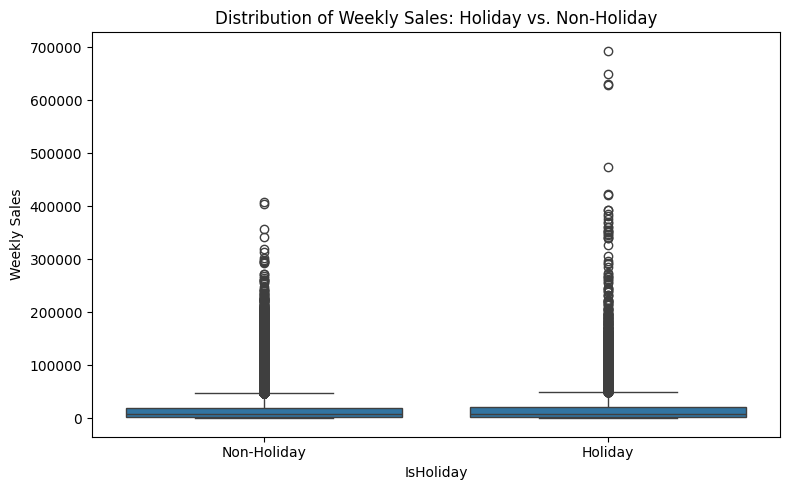

In [33]:
# Plot 2: Box Plot for Distribution of Weekly Sales
fig, ax2 = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales', ax=ax2)
ax2.set_title('Distribution of Weekly Sales: Holiday vs. Non-Holiday')
ax2.set_ylabel('Weekly Sales')
ax2.set_xticklabels(['Non-Holiday', 'Holiday'])


plt.tight_layout()
plt.show()

In [34]:
# Print the exact average values for reference
print("\nAverage Weekly Sales:")
print(holiday_avg_sales)


Average Weekly Sales:
IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64


In [35]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [36]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [37]:
# Filter the DataFrame to only include rows where IsHoliday is True
holiday_weeks_df = features_df[features_df['IsHoliday'] == True]

# Display the unique dates for those holiday weeks
print("Unique holiday dates found in the dataset:")
print(holiday_weeks_df['Date'].unique())

Unique holiday dates found in the dataset:
['2010-02-12' '2010-09-10' '2010-11-26' '2010-12-31' '2011-02-11'
 '2011-09-09' '2011-11-25' '2011-12-30' '2012-02-10' '2012-09-07'
 '2012-11-23' '2012-12-28' '2013-02-08']


In [38]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [39]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [40]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [41]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

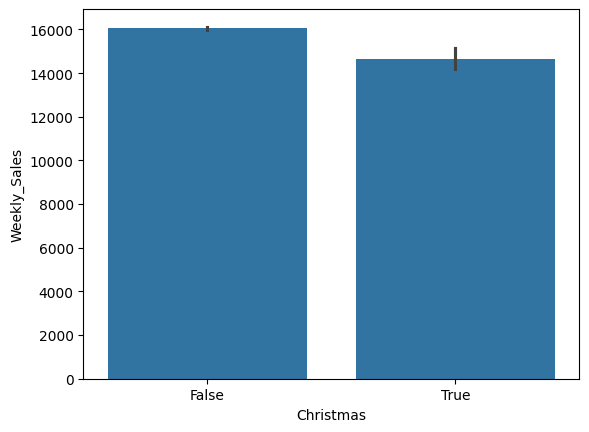

In [42]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

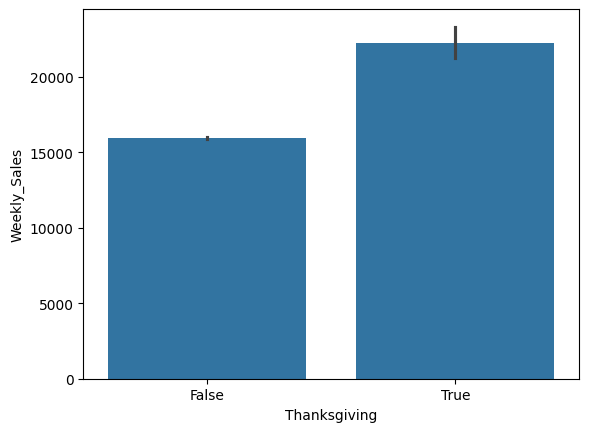

In [43]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

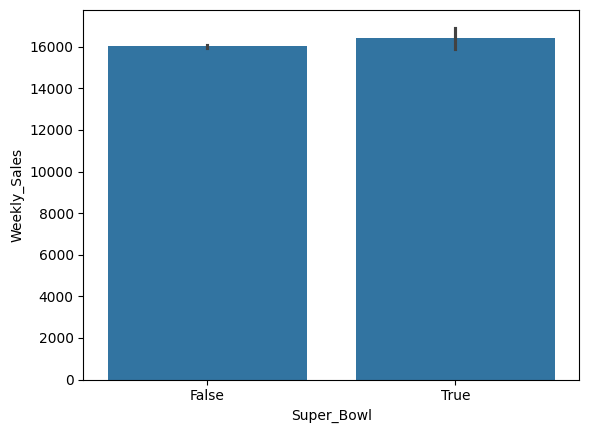

In [44]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

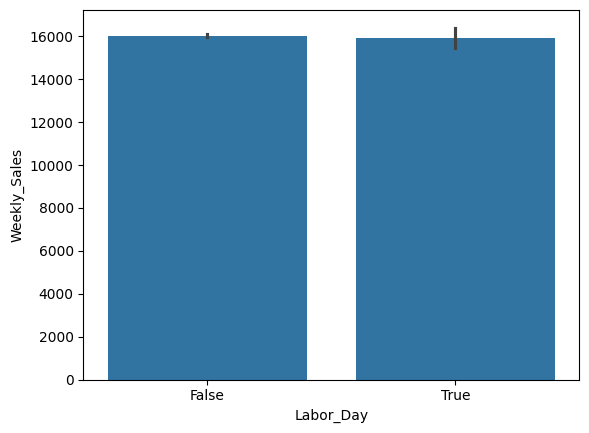

In [45]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

In [46]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [47]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [48]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [49]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

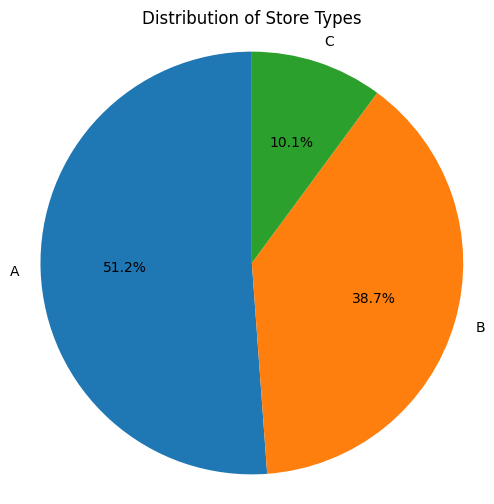

In [50]:
# Get the counts of each store type
type_counts = df['Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Store Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

,Weekly_Sales
IsHoliday,
False,15952.816352
True,17094.300918


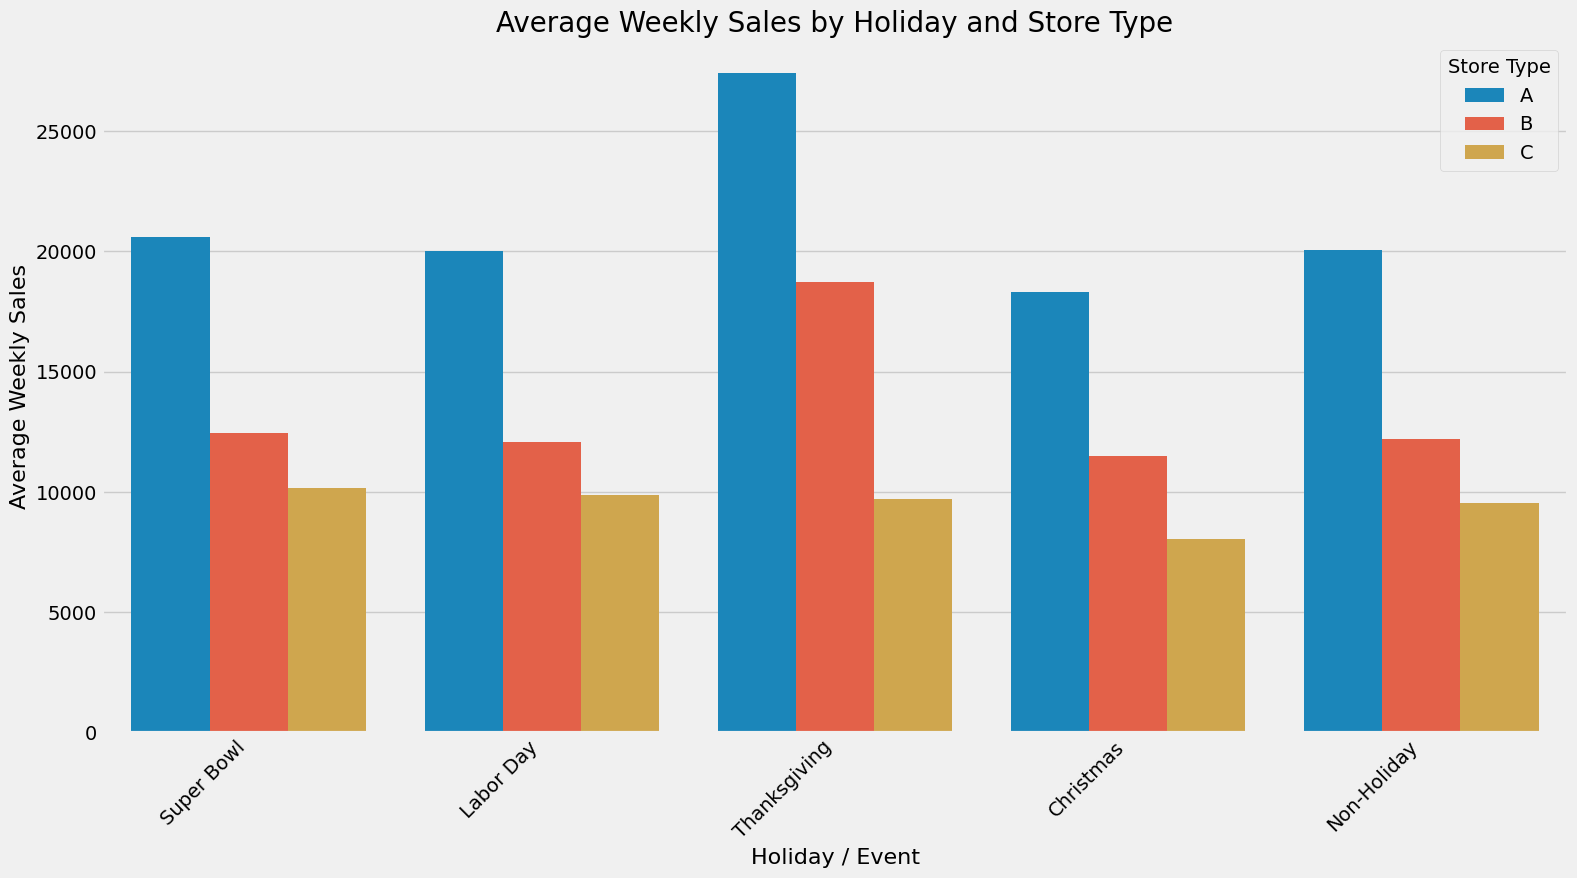


Average Weekly Sales Data used for the chart:


Type,A,B,C
Holiday_Name,,,
Super Bowl,20612.76,12467.04,10179.27
Labor Day,20004.27,12084.30,9893.46
Thanksgiving,27397.78,18733.97,9696.57
Christmas,18310.17,11488.99,8031.52
Non-Holiday,20058.21,12204.87,9548.25


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Preparation
# Create a 'Holiday_Name' column based on the specific holiday columns
def get_holiday_name(row):
    if row['Super_Bowl']:
        return 'Super Bowl'
    elif row['Labor_Day']:
        return 'Labor Day'
    elif row['Thanksgiving']:
        return 'Thanksgiving'
    elif row['Christmas']:
        return 'Christmas'
    else:
        return 'Non-Holiday'

df['Holiday_Name'] = df.apply(get_holiday_name, axis=1)


# Group by both Holiday and Store Type and calculate the mean sales
holiday_store_avg_sales = df.groupby(['Holiday_Name', 'Type'])['Weekly_Sales'].mean().reset_index()

# Define a logical order for the holidays and store types for plotting
holiday_order = ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Non-Holiday']
type_order = ['A', 'B', 'C']


# Visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 9))

# Create the grouped bar chart using seaborn
sns.barplot(
    data=holiday_store_avg_sales,
    x='Holiday_Name',
    y='Weekly_Sales',
    hue='Type',
    order=holiday_order,
    hue_order=type_order
)

#  Chart Customization
plt.title('Average Weekly Sales by Holiday and Store Type', fontsize=20)
plt.xlabel('Holiday / Event', fontsize=16)
plt.ylabel('Average Weekly Sales', fontsize=16)
plt.xticks(rotation=45, ha="right") # Rotate labels for better readability
plt.legend(title='Store Type')
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()


# Print the aggregated data table for reference
print("\nAverage Weekly Sales Data used for the chart:")
# Pivot the data to make it easier to read
pivoted_sales_data = holiday_store_avg_sales.pivot_table(
    values='Weekly_Sales',
    index='Holiday_Name',
    columns='Type'
).loc[holiday_order] # Use the same order as the chart

display(pivoted_sales_data.round(2))

In [53]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Holiday_Name
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,...,NaN,126.669267,9.003,B,126512,False,False,True,False,Thanksgiving
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,...,6386.86,140.421786,8.745,B,103681,False,False,True,False,Thanksgiving
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,...,1009.98,129.836400,7.874,B,126512,False,False,True,False,Thanksgiving
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,...,NaN,136.689571,8.763,B,103681,False,False,True,False,Thanksgiving
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,...,NaN,182.783277,8.724,A,200898,False,False,True,False,Thanksgiving


In [54]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Holiday_Name
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,...,NaN,126.669267,9.003,B,126512,False,False,True,False,Thanksgiving
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,...,6386.86,140.421786,8.745,B,103681,False,False,True,False,Thanksgiving
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,...,1009.98,129.836400,7.874,B,126512,False,False,True,False,Thanksgiving
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,...,NaN,136.689571,8.763,B,103681,False,False,True,False,Thanksgiving
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,...,NaN,182.783277,8.724,A,200898,False,False,True,False,Thanksgiving


In [55]:
stores_df.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


/tmp/ipython-input-1110727572.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{x:,.0f}' for x in ax1.get_yticks()]) # Format y-axis labels
/tmp/ipython-input-1110727572.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{x:,.0f}' for x in ax2.get_yticks()]) # Format y-axis labels


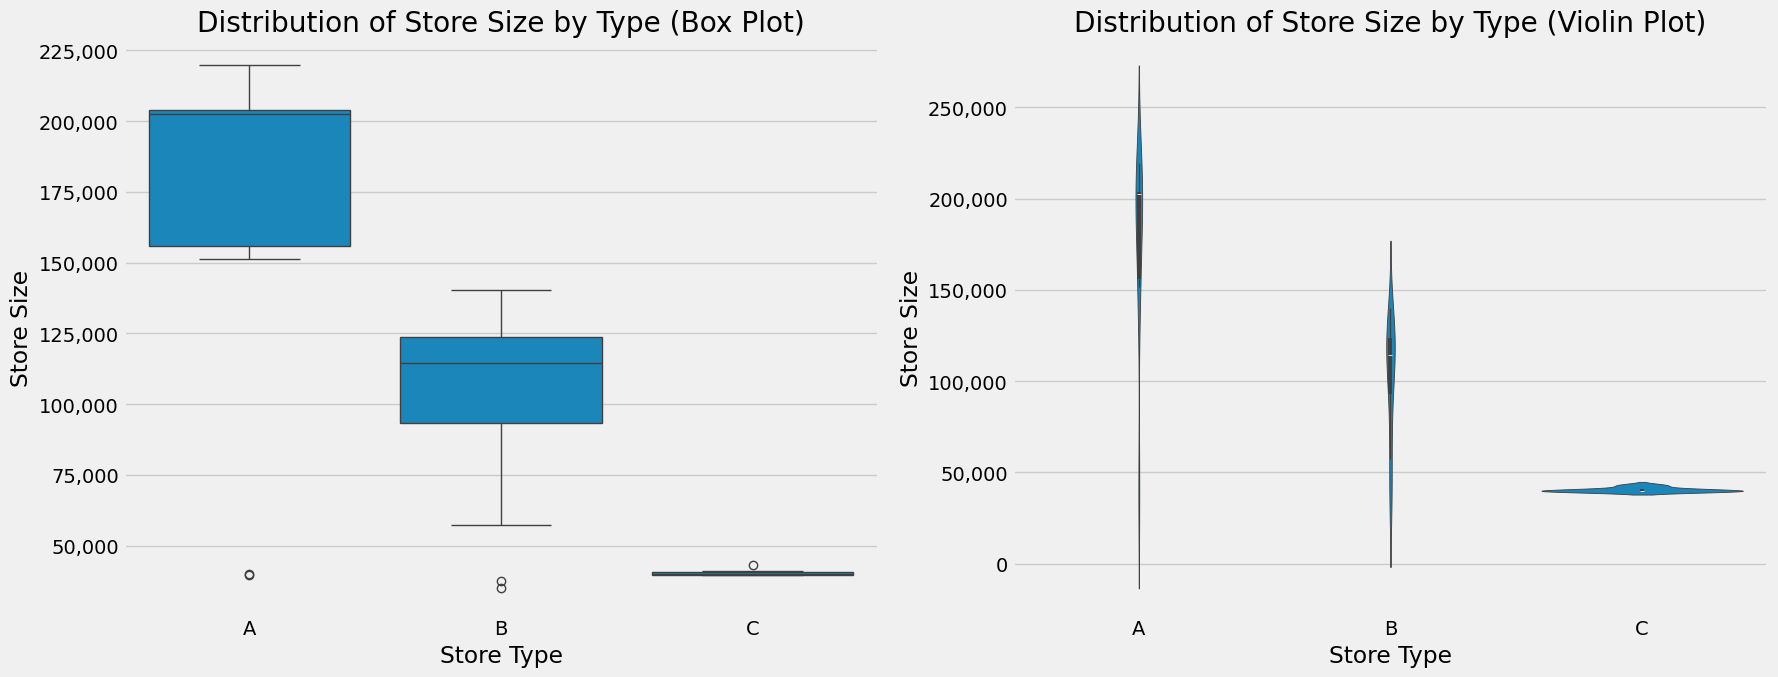

In [57]:
# Set the style for the plots
plt.style.use('fivethirtyeight')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

#  Plot 1: Box Plot
sns.boxplot(data=stores_df, x='Type', y='Size', order=['A', 'B', 'C'], ax=ax1)
ax1.set_title('Distribution of Store Size by Type (Box Plot)')
ax1.set_ylabel('Store Size')
ax1.set_xlabel('Store Type')
ax1.set_yticklabels([f'{x:,.0f}' for x in ax1.get_yticks()]) # Format y-axis labels

# Plot 2: Violin Plot (More detailed view of the distribution shape)
sns.violinplot(data=stores_df, x='Type', y='Size', order=['A', 'B', 'C'], ax=ax2)
ax2.set_title('Distribution of Store Size by Type (Violin Plot)')
ax2.set_ylabel('Store Size')
ax2.set_xlabel('Store Type')
ax2.set_yticklabels([f'{x:,.0f}' for x in ax2.get_yticks()]) # Format y-axis labels

plt.tight_layout()
plt.show()

In [58]:
import matplotlib.pyplot as plt

# Data Preparation
# We use the aggregated total_weekly_sales from our previous steps
total_weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

In [61]:
#  Forecasting
# Choose a window size for the rolling mean
forecast_window = 4 # Let's use a 4-week moving average

# Calculate the rolling mean and shift it forward by 1 period to create the forecast
total_weekly_sales_forecast = total_weekly_sales.rolling(window=forecast_window).mean().shift(1)

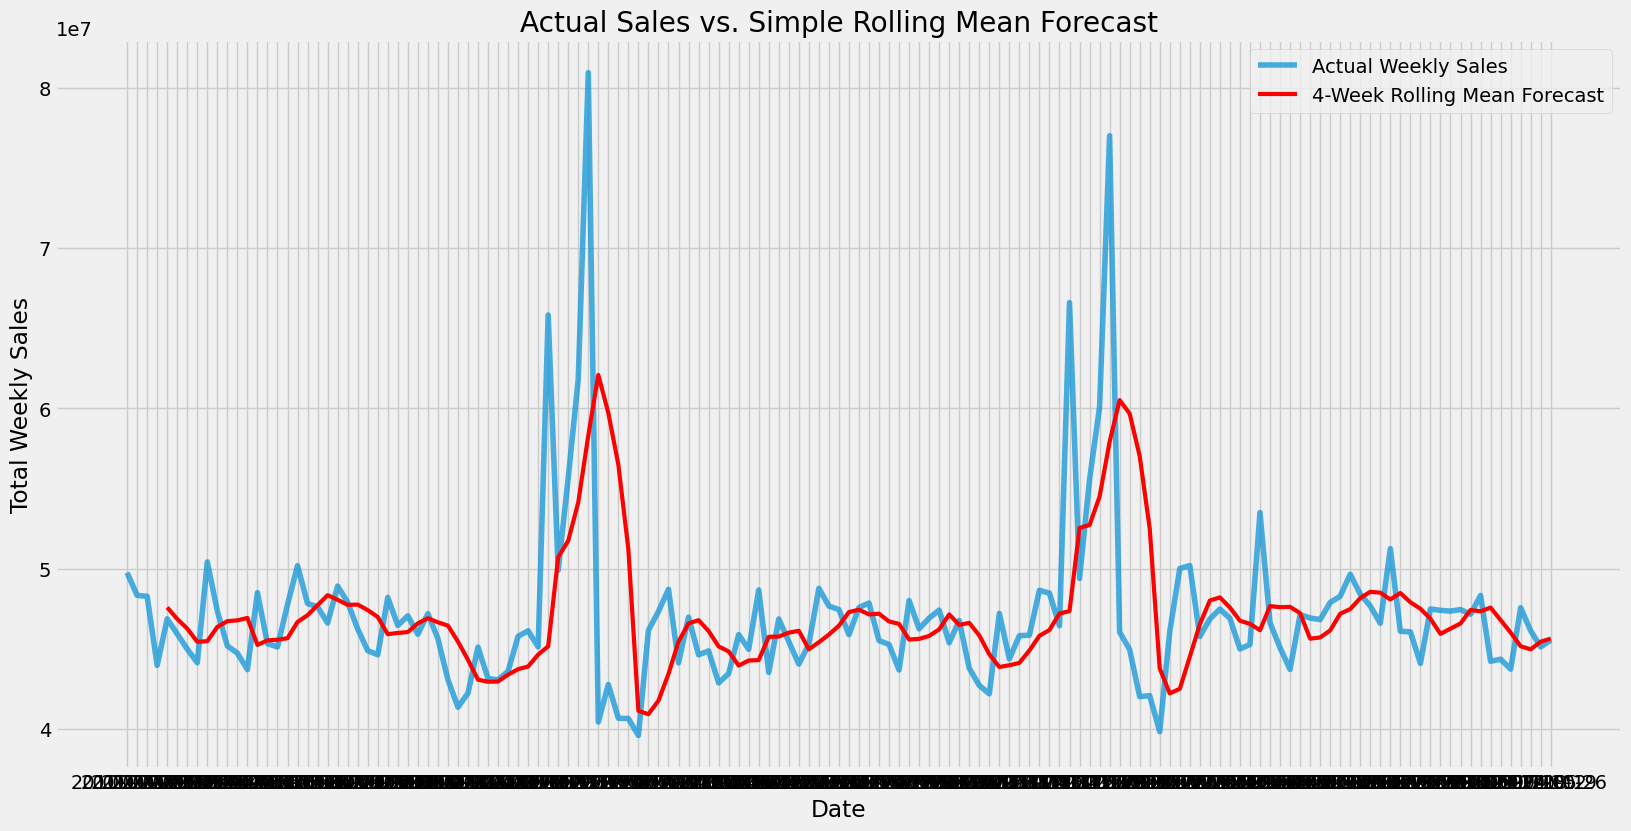

In [60]:
# Visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 9))

# Plot the actual sales data
plt.plot(total_weekly_sales.index, total_weekly_sales, label='Actual Weekly Sales', alpha=0.7)

# Plot the forecasted sales data
plt.plot(total_weekly_sales_forecast.index, total_weekly_sales_forecast, label=f'{forecast_window}-Week Rolling Mean Forecast', color='red', linewidth=3)

plt.title('Actual Sales vs. Simple Rolling Mean Forecast')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Print the last few actual and forecasted values to compare
print("\nComparison of last 10 weeks:")
comparison_df = pd.DataFrame({
    'Actual Sales': total_weekly_sales.tail(10),
    'Forecasted Sales': total_weekly_sales_forecast.tail(10)
})
print(comparison_df.round(2))


Comparison of last 10 weeks:
            Actual Sales  Forecasted Sales
Date                                      
2012-08-24   47449420.62       46585682.69
2012-08-31   47159931.47       47423690.78
2012-09-07   48330449.03       47342142.85
2012-09-14   44226897.92       47573798.56
2012-09-21   44354937.08       46791674.76
2012-09-28   43735713.56       46018053.88
2012-10-05   47567053.49       45161999.40
2012-10-12   46128909.98       44971150.51
2012-10-19   45122443.96       45446653.53
2012-10-26   45544379.53       45638530.25


In [64]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate to monthly
monthly_sales = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Store', 'Dept'])['Weekly_Sales'].sum().reset_index()
monthly_sales = monthly_sales[monthly_sales['Weekly_Sales'] > 0]
monthly_sales['Moving_Avg'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()
monthly_sales = monthly_sales.merge(stores_df, on='Store')

In [65]:
# Define the aggregation rules for each column
aggregation_rules = {
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'IsHoliday': 'sum'
}

In [66]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Resample the DataFrame to a monthly frequency using the specified rules
monthly_df = df.resample('ME', on='Date').agg(aggregation_rules)

print("Successfully created the monthly dataset!")
print("Here are the first 5 rows:")
display(monthly_df.head())

Successfully created the monthly dataset!
Here are the first 5 rows:


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,,
2010-02-28,1.903360e+08,35.578510,2.693193,167.455953,8.570795,2949
2010-03-31,1.819236e+08,46.695948,2.786435,167.557149,8.574451,0
2010-04-30,2.314140e+08,56.409791,2.867522,167.255377,8.446639,0
2010-05-31,1.867116e+08,64.884550,2.917179,167.267314,8.451819,0
2010-06-30,1.922469e+08,74.595153,2.787978,167.634269,8.452569,0


In [67]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2010-02-28 to 2012-10-31
Freq: ME
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  33 non-null     float64
 1   Temperature   33 non-null     float64
 2   Fuel_Price    33 non-null     float64
 3   CPI           33 non-null     float64
 4   Unemployment  33 non-null     float64
 5   IsHoliday     33 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 KB


In [68]:

# Calculate a 12-month rolling mean on the monthly sales data
monthly_rolling_mean = monthly_df['Weekly_Sales'].rolling(window=12).mean()

<Axes: xlabel='Date'>

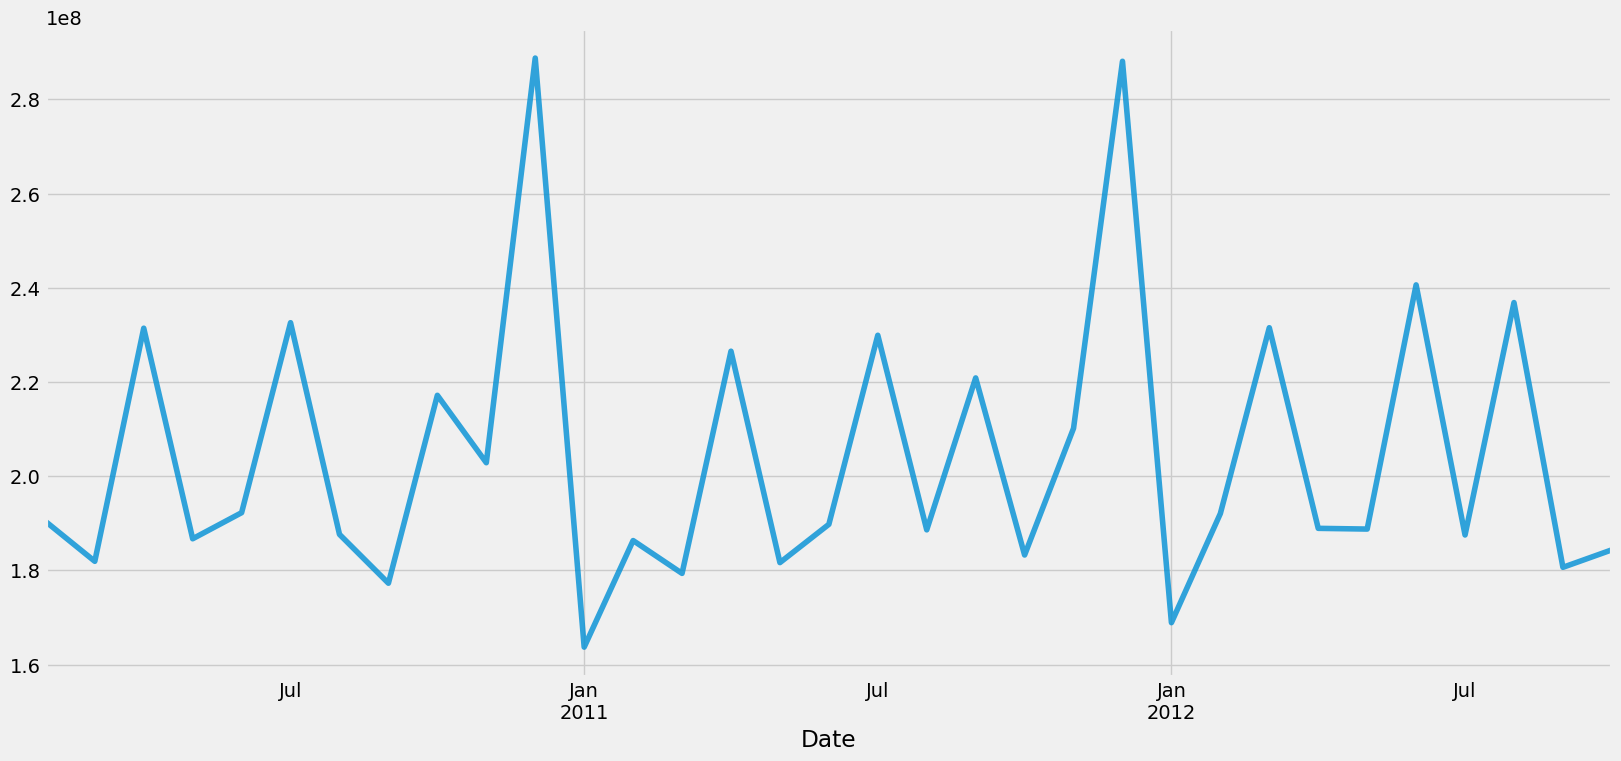

In [69]:
# Visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 8))
# Plotting the raw monthly sales
monthly_df['Weekly_Sales'].plot(label='Total Monthly Sales', alpha=0.8)

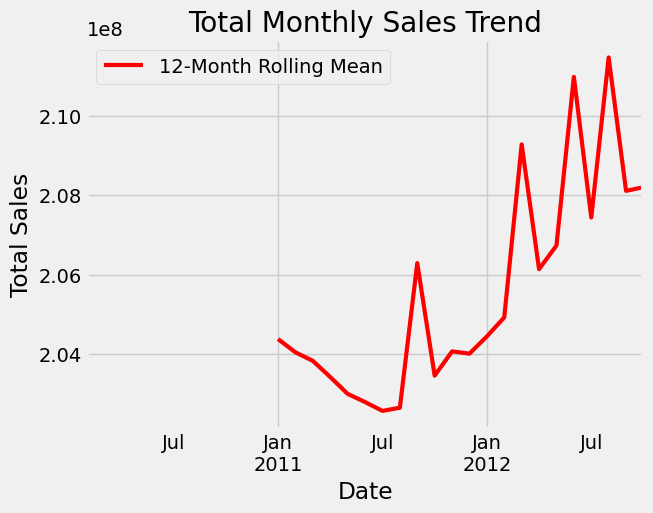

In [70]:
# Plotting the 12-month rolling mean
monthly_rolling_mean.plot(label='12-Month Rolling Mean', color='red', linewidth=3)

plt.title('Total Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Set 'Date' as the index of the DataFrame
df_indexed = df.set_index('Date')

# Create a pivot table with Date as index, Type as columns, and sum of Weekly_Sales as values
monthly_by_type = df_indexed.pivot_table(
    values='Weekly_Sales',
    index=df_indexed.index,
    columns='Type',
    aggfunc='sum'
)

# Now, resample this pivot table to monthly frequency
monthly_by_type = monthly_by_type.resample('ME').sum()

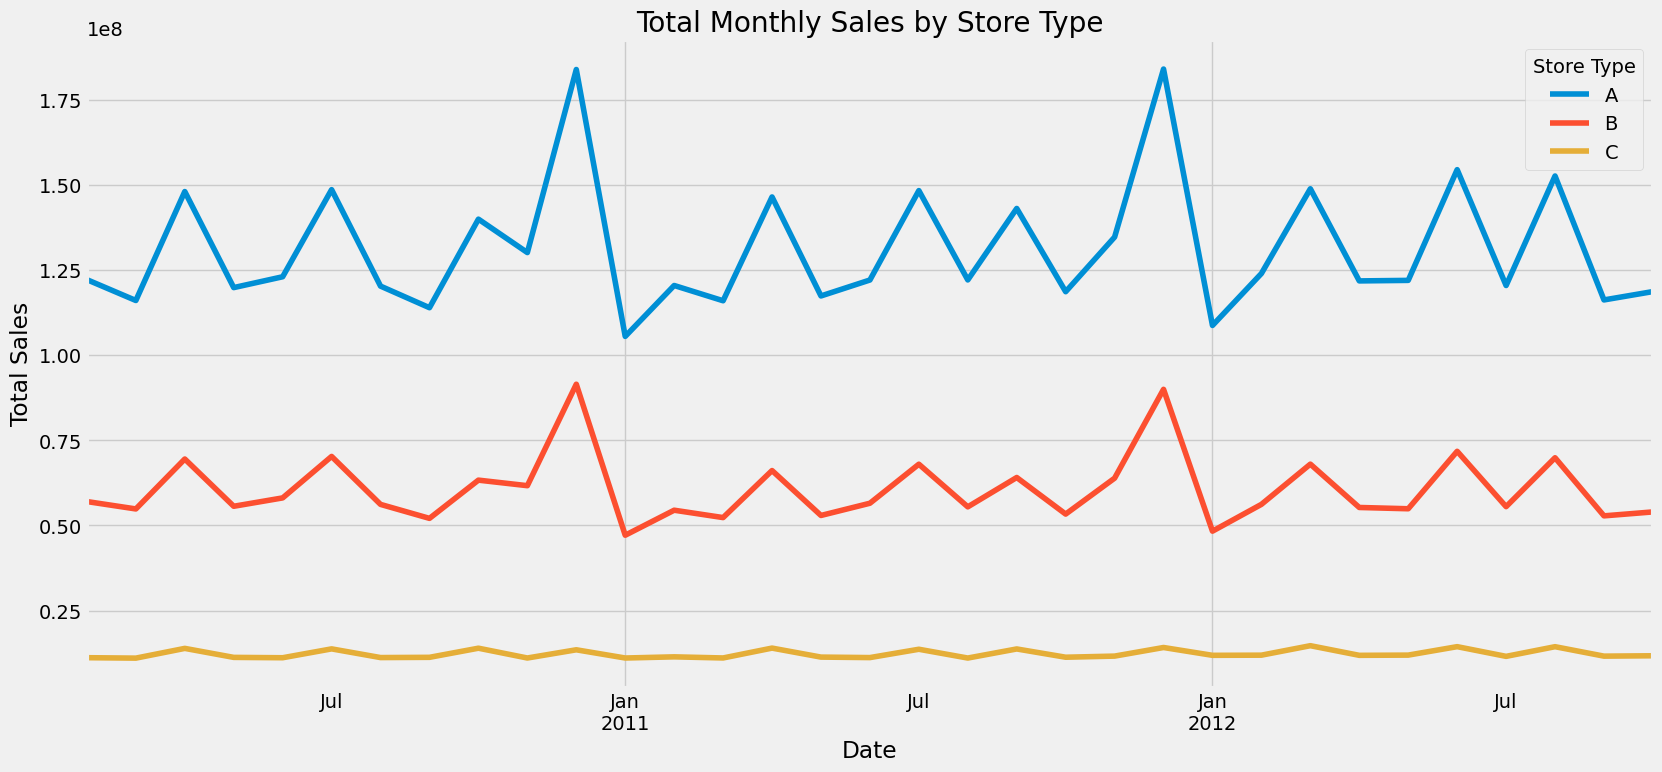


Last 6 months of sales data broken down by Store Type:
Type                   A            B            C
Date                                              
2012-05-31  1.219254e+08  54898648.29  11945004.07
2012-06-30  1.544247e+08  71761740.86  14425121.74
2012-07-31  1.204142e+08  55518761.91  11578360.45
2012-08-31  1.525693e+08  69871357.96  14414008.31
2012-09-30  1.161872e+08  52816105.95  11644657.25
2012-10-31  1.186403e+08  53972236.09  11750278.42


In [72]:
# Visualization
plt.figure(figsize=(18, 8))
monthly_by_type.plot(kind='line', ax=plt.gca()) # Plot all columns (A, B, C) on the same axes

plt.title('Total Monthly Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Store Type')
plt.grid(True)
plt.show()

print("\nLast 6 months of sales data broken down by Store Type:")
print(monthly_by_type.tail(6))

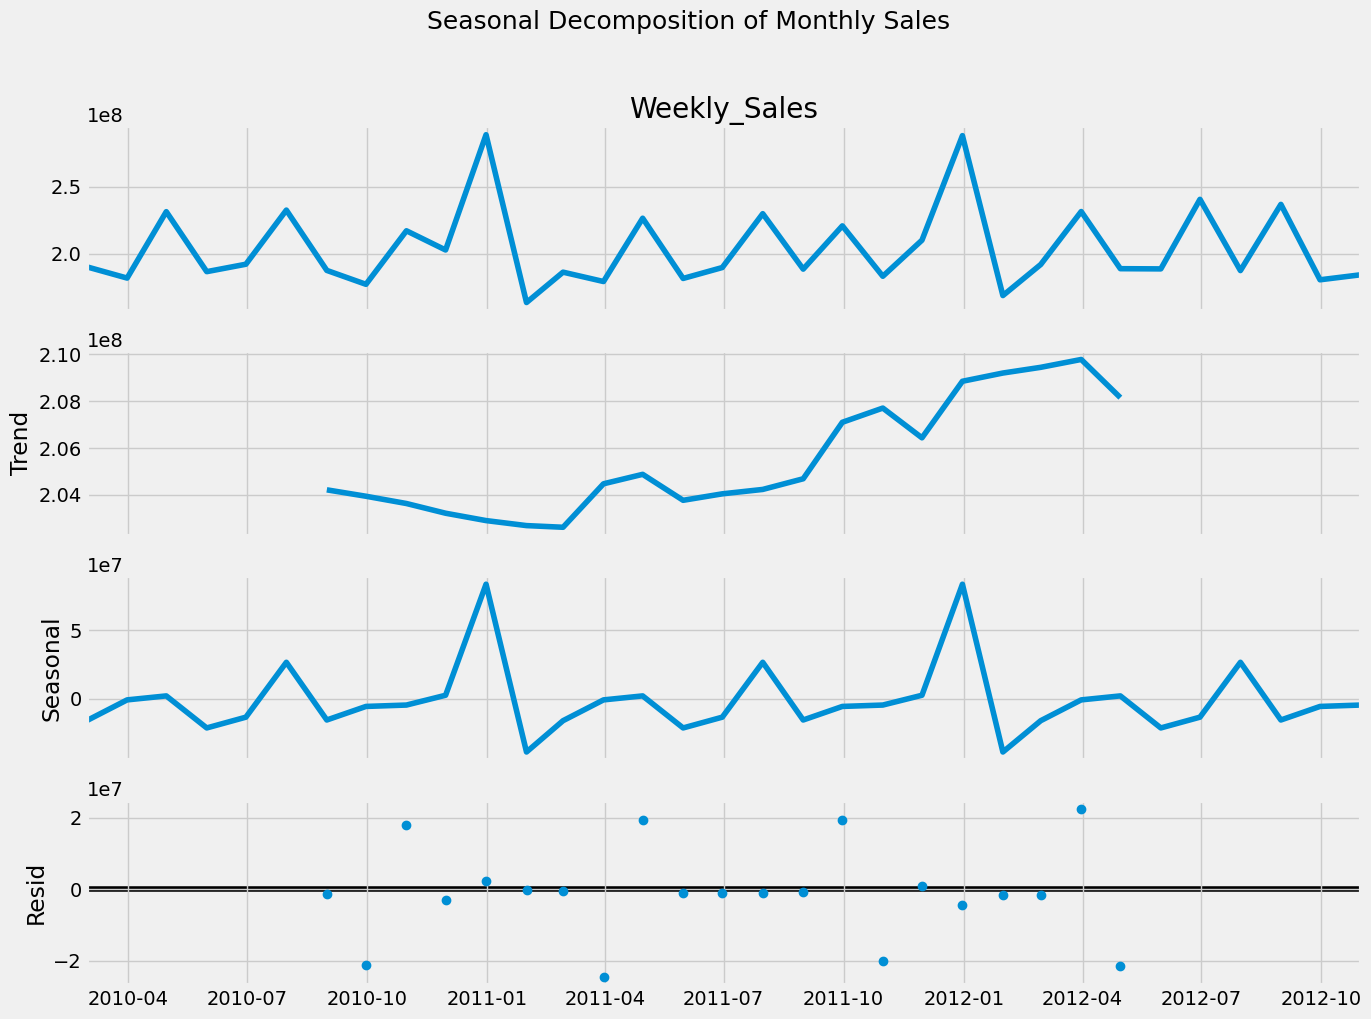

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Seasonal Decomposition of monthly sales
decomposition = seasonal_decompose(monthly_df['Weekly_Sales'], model='additive', period=12)

# Create a figure to plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Monthly Sales', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3854438436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Weekly_Sales', data=monthly_df, palette='viridis')


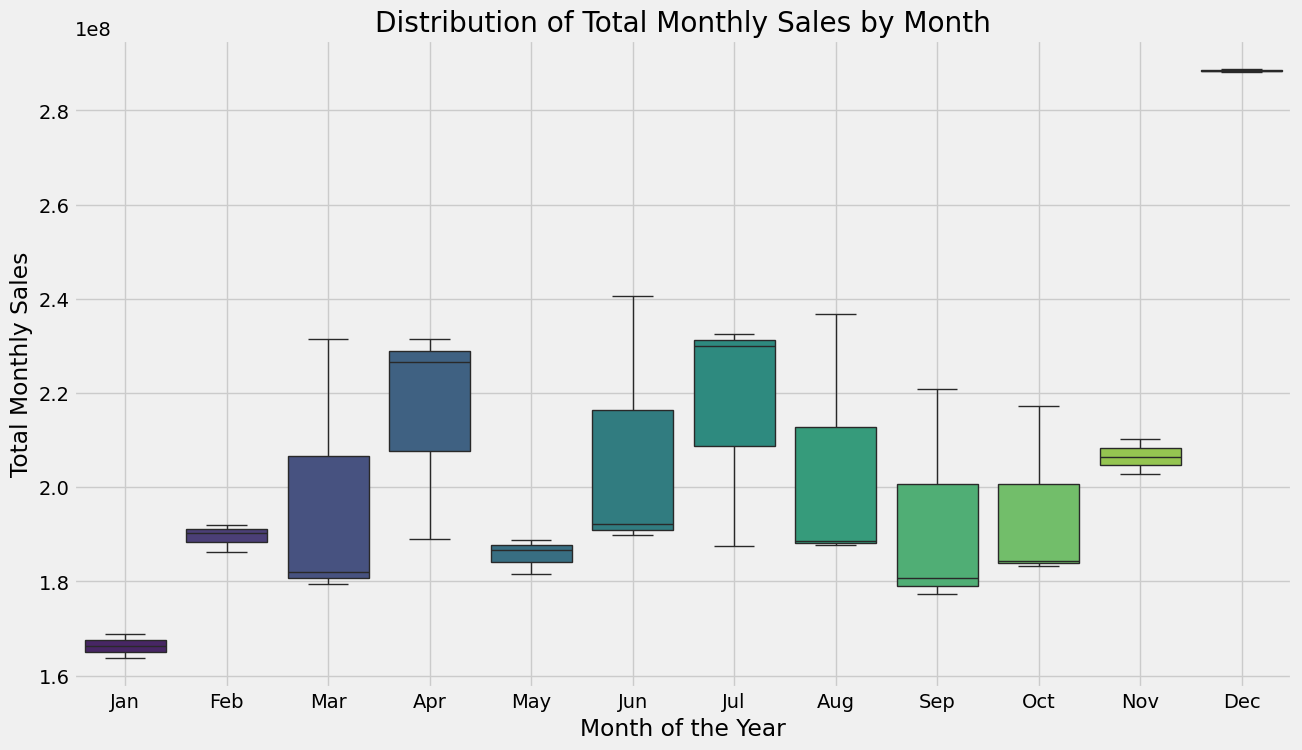

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'Month' column to our monthly DataFrame to group by
monthly_df['Month'] = monthly_df.index.month

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Weekly_Sales', data=monthly_df, palette='viridis')

plt.title('Distribution of Total Monthly Sales by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Total Monthly Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

/tmp/ipython-input-2124728188.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_depts.index, y=top_10_depts.values, order=top_10_depts.index, palette='magma')
/tmp/ipython-input-2124728188.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.1f}B'.format(x / 1e9) for x in current_values])


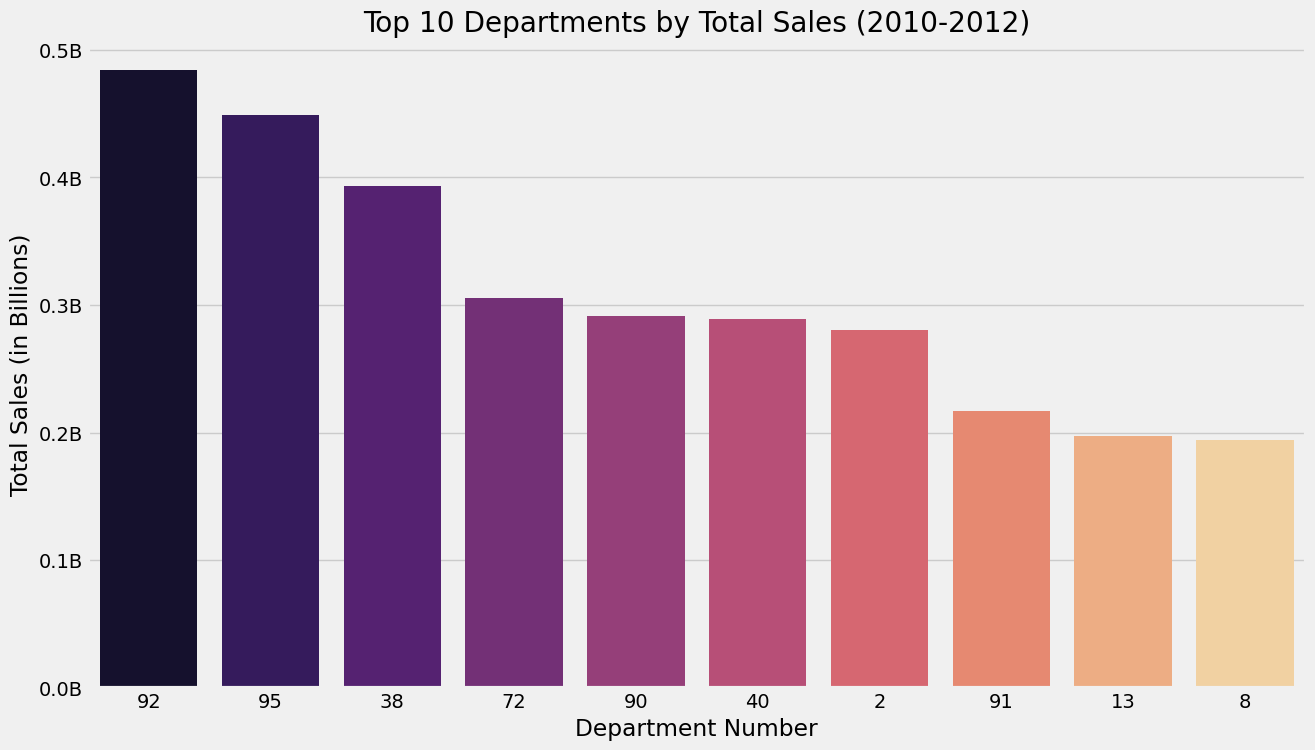

Top 10 Departments by Total Sales:
Dept
92    $483,943,342
95    $449,320,163
38    $393,118,137
72    $305,728,200
90    $291,068,464
40    $288,936,022
2     $280,611,174
91    $216,781,706
13    $197,321,570
8     $194,280,781


In [75]:
#TOP 10 Departments
# Group the df by Department and sum the Weekly_Sales
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

# Get the top 10 departments
top_10_depts = dept_sales.head(10)

# Visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 8))

# Create a bar plot for the top 10 departments
sns.barplot(x=top_10_depts.index, y=top_10_depts.values, order=top_10_depts.index, palette='magma')

plt.title('Top 10 Departments by Total Sales (2010-2012)')
plt.xlabel('Department Number')
plt.ylabel('Total Sales (in Billions)')

# Format y-axis to be more readable
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}B'.format(x / 1e9) for x in current_values])

plt.show()

# Print the data for the top 10 departments
print("Top 10 Departments by Total Sales:")
# Format the Series values before printing
print(top_10_depts.apply(lambda x: '${:,.0f}'.format(x)).to_string())

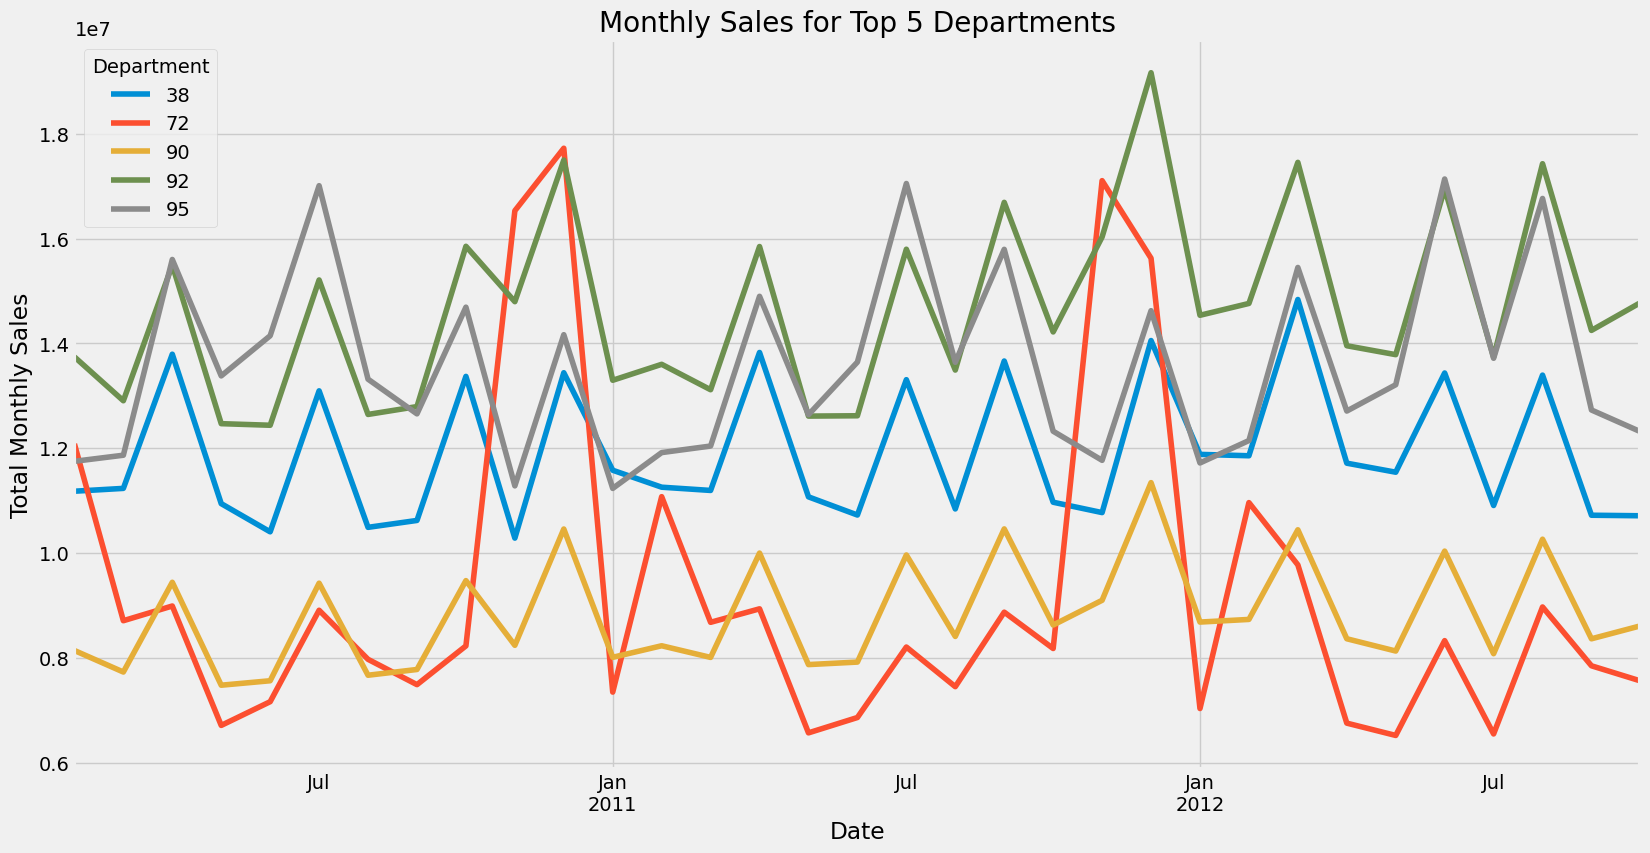

In [77]:
# Data Preparation for Time Series
# Get the list of the top 5 department numbers
top_5_dept_numbers = dept_sales.head(5).index.tolist()

# Filter our main dataframe to only include these top departments
top_depts_df = df[df['Dept'].isin(top_5_dept_numbers)]

# Set 'Date' as the index of the top_depts_df
top_depts_df = top_depts_df.set_index('Date')

# Create a pivot table to get monthly sales for each of these departments
monthly_top_depts = top_depts_df.pivot_table(
    values='Weekly_Sales',
    index=top_depts_df.index,
    columns='Dept',
    aggfunc='sum'
).resample('ME').sum()

# Visualization
plt.figure(figsize=(18, 9))
monthly_top_depts.plot(kind='line', ax=plt.gca())

plt.title('Monthly Sales for Top 5 Departments')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales')
plt.legend(title='Department')
plt.grid(True)
plt.show()

In [78]:
# Resample the DataFrame on the 'Date' column to a monthly frequency and sum the 'Weekly_Sales'
monthly_sales = df.resample('ME', on='Date')['Weekly_Sales'].sum()

In [79]:
# Split the data into Training and Testing sets
# We will use the data up to the end of 2011 to train, and we will try to forecast 2012.
train_data = monthly_sales[:'2011']
test_data = monthly_sales['2012':]

In [80]:
#Generate the Seasonal Naive Forecas
# The forecast is the value from 12 months ago.
# We take the last 12 months of our training data to predict the next 12 months.
seasonal_forecast = train_data[-len(test_data):].shift(len(test_data), freq='M')

/tmp/ipython-input-2907248828.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  seasonal_forecast = train_data[-len(test_data):].shift(len(test_data), freq='M')


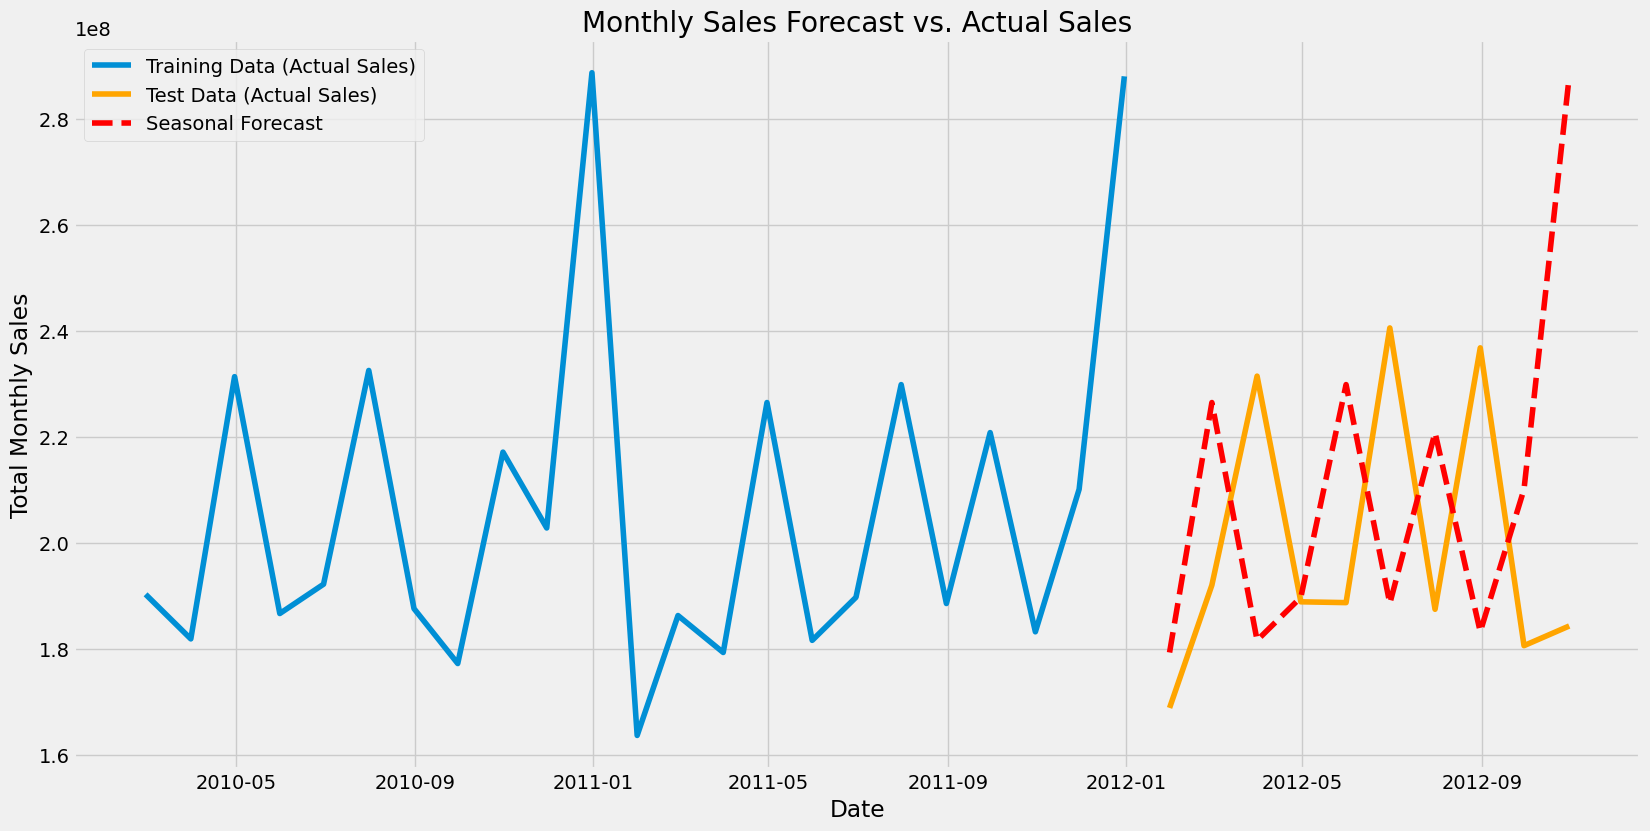

In [81]:
# Adjust the index to match the test data's dates for plotting
seasonal_forecast.index = test_data.index


# Visualize and Evaluate
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 9))

# Plot the different datasets
plt.plot(train_data, label='Training Data (Actual Sales)')
plt.plot(test_data, label='Test Data (Actual Sales)', color='orange')
plt.plot(seasonal_forecast, label='Seasonal Forecast', color='red', linestyle='--')

plt.title('Monthly Sales Forecast vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, seasonal_forecast)
print(f"\nMean Absolute Error (MAE) of the forecast: ${mae:,.2f}")
print("This means, on average, our forecast was off by about this amount each month.")


Mean Absolute Error (MAE) of the forecast: $40,897,168.60
This means, on average, our forecast was off by about this amount each month.


In [83]:
 #Display a table comparing the actual vs. forecast
comparison_df = pd.DataFrame({
    'Actual Sales': test_data,
    'Forecasted Sales': seasonal_forecast
})
print("\nComparison of Actual vs. Forecasted Sales for 2012:")
print(comparison_df.round(2))


Comparison of Actual vs. Forecasted Sales for 2012:
            Actual Sales  Forecasted Sales
Date                                      
2012-01-31  1.688965e+08      1.793600e+08
2012-02-29  1.920652e+08      2.265291e+08
2012-03-31  2.315138e+08      1.816491e+08
2012-04-30  1.889227e+08      1.897750e+08
2012-05-31  1.887691e+08      2.299150e+08
2012-06-30  2.406116e+08      1.886016e+08
2012-07-31  1.875113e+08      2.208554e+08
2012-08-31  2.368547e+08      1.832631e+08
2012-09-30  1.806480e+08      2.101634e+08
2012-10-31  1.843628e+08      2.880830e+08


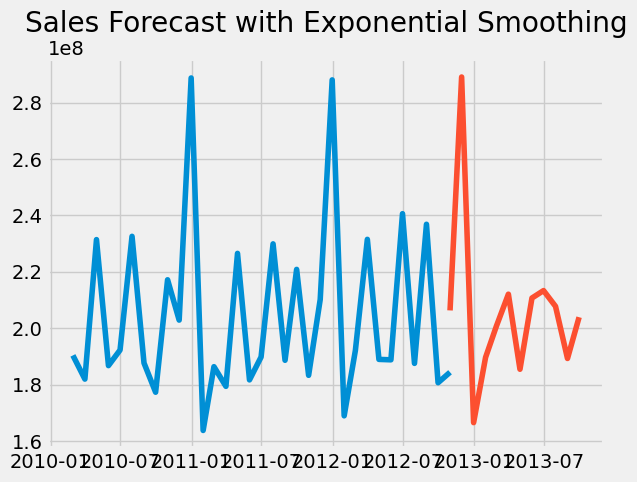

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

# Exponential smoothing forecast
model = ExponentialSmoothing(monthly_sales, seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)
plt.plot(monthly_sales.index, monthly_sales.values, label='Actual')
plt.plot(pd.date_range(start=monthly_sales.index.max(), periods=12, freq='ME'), forecast, label='Forecast')
plt.title('Sales Forecast with Exponential Smoothing')
plt.show()

## Summary and Key Findings

Based on the analysis performed:

*   **Data Overview:** We loaded and merged three datasets (`stores.csv`, `features.csv`, and `train.csv`) to create a comprehensive DataFrame for analysis. We handled negative weekly sales by removing those records.
*   **Holiday Impact:** Weekly sales are generally higher during holiday weeks compared to non-holiday weeks. Thanksgiving appears to have the most significant positive impact on weekly sales, while Christmas holiday weeks show a slight decrease in average sales compared to non-holiday weeks. Super Bowl and Labor Day holidays also show a minor increase in average sales.
*   **Store Types and Size:** There are three types of stores (A, B, and C), with Type A stores being the largest on average, followed by Type B, and then Type C. The distribution of store sizes within each type is also distinct.
*   **Monthly Sales Trends:** The total monthly sales show a clear seasonal pattern, with peaks typically occurring around the end of the year (likely due to holiday sales). The 12-month rolling mean indicates a general upward trend in sales over the observed period.
*   **Sales by Store Type (Monthly):** Analyzing monthly sales by store type shows that Type A stores consistently have the highest total sales, followed by Type B, and then Type C. All store types exhibit similar seasonal patterns.
*   **Top Departments:** The top 10 departments contribute significantly to the total sales. Departments 92, 95, and 38 have the highest total sales.
*   **Top 5 Departments (Monthly Sales):** The monthly sales of the top 5 departments also show seasonality and contribute to the overall monthly sales pattern.
*   **Forecasting:** A simple rolling mean forecast and an Exponential Smoothing model were implemented to predict future sales based on historical monthly sales data. The Mean Absolute Error (MAE) was calculated for the seasonal naive forecast, providing a measure of the forecast accuracy.